In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from scipy import *
from scipy.signal import find_peaks
%matplotlib inline
from pylab import standard_normal
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import pymc3 as pm
from sklearn.mixture import GaussianMixture

In [7]:
result_path='C:/Users/zoro/Desktop/MTRACK_response/simulation_response/results/'

In [4]:
# bw=2
# kv=1

# #x is the observable, y is the shift variable, basin_w is 
# def D_W(x,y,basin_w,k):
#     return k*((x-2*y)**2-basin_w)**2+3*y**4
# def D_W_pdf(x,y,basin_w=bw,k=kv):
#     return exp(-D_W(x, y,basin_w,k))

# def gradx(x,y,basin_w,k):
# # calculate -dV/dx:
#     return 4*basin_w*k*(x-2*y)-4*k*(x-2*y)**3

In [5]:
bw=1
kv=2
def D_W(x,y,basin_w,k):
    return (x-k*y)**4-2*basin_w*(x-k*y)**2-(x-k*y)**3+3.0*y**4

def D_W_pdf(x,y,basin_w=bw,k=kv):
    return exp(-D_W(x, y,basin_w,k))

def gradx(x,y,basin_w,k):
# calculate -dV/dx:
    return -4*(x-k*y)**3+4*basin_w*(x-k*y)+3*(x-k*y)**2

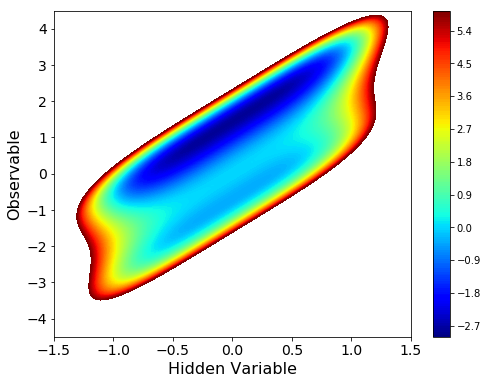

In [10]:
U_lim=6
x_range=4.5
y_range=1.5
step=0.05

xe=np.linspace(-x_range, x_range, 100)
ye=np.linspace(-y_range, y_range, 100)
energyContours=np.zeros((100, 100))
for i in range(0,len(xe)):
    for j in range(0,len(ye)):
        xtmp=np.array([xe[i], ye[j]])
        energyContours[j,i]=D_W(xe[i], ye[j],basin_w=bw,k=kv)

levels = np.arange(-3, U_lim, 0.05)

plt.figure(figsize=(8,6))
# plt.contour(xe, ye, energyContours, levels, cmap=plt.cm.jet)
plt.contourf( ye,xe, energyContours.T, levels, alpha=1,cmap=plt.cm.jet)
#plt.contourf( xe,ye, energyContours, levels, alpha=1,cmap=plt.cm.jet)

plt.ylabel('Observable',fontsize=16)
plt.xlabel('Hidden Variable',fontsize=16)
# plt.axis('equal')
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
plt.colorbar()
plt.savefig(result_path+'potential.png',dpi=300)

plt.show()


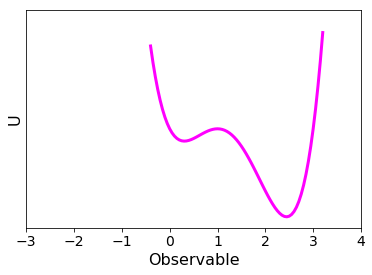

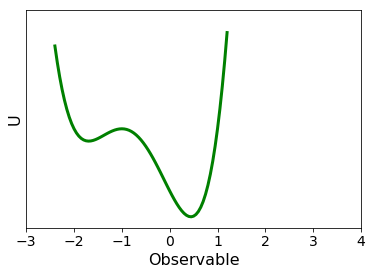

In [8]:
# X = np.arange(-x_range, x_range, 0.01)
# Y = np.arange(-y_range, y_range, 0.01)
# X, Y = np.meshgrid(X, Y)
# Z = D_W(X,Y,basin_w=bw,k=kv)
# R=np.where(Z<U_lim,Z,np.nan)

# fig = plt.figure(figsize=(9,6))
# ax = fig.gca(projection='3d')
# norm = matplotlib.colors.Normalize(vmin=0, vmax=U_lim)
# plt.cm.jet.set_under((0,0,0,0))
# plt.cm.jet.set_over((0,0,0,0))

# # ax.contourf(X, Y, R, offset=-1, cmap=plt.cm.coolwarm, norm=norm)
# surf = ax.plot_surface(X, Y, R,rcount=800,ccount=250,cmap=plt.cm.jet, norm=norm)

# plt.xticks(np.arange(-x_range,x_range+step,2).tolist(),fontsize=14)
# plt.yticks([-1,0,1],fontsize=14)
# ax.set_zlim(0,U_lim)
# ax.set_zticks([])
# # axisEqual3D(ax)
# # ax.grid(False)
# # make the panes transparent
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# # make the grid lines transparent
# # ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# # ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# #ax.zaxis.set_major_locator(LinearLocator(3))#----number of ticks
# # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))#----accuracy of ticks
# #for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(14)

# ax.set_xlabel('Observable',fontsize=16,labelpad=15)

# ax.set_ylabel('Hidden Slow Variable',fontsize=16,labelpad=15)
# ax.set_zlabel('U', fontsize=16)#ax.set_zlabel(r'$\gamma$', fontsize=30, rotation=60)
# fig.colorbar(surf, shrink=0.5, aspect=10)
# ax.view_init(azim=235, elev=77)
# # plt.savefig(result_path+'potential.png',dpi=300)

# plt.show()







X=np.arange(-0.4,3.2+step,step)
plt.figure(figsize=(6,4))
plt.plot(X,D_W(X,y=0.5,basin_w=bw,k=kv),color='magenta',linewidth=3)

plt.xlabel('Observable',fontsize=16)
plt.ylabel('U',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks([],fontsize=14)
plt.axis([-3,4,-3,4])
plt.savefig(result_path+'1D_potential_Y0.5.png',dpi=300)
plt.show()

X=np.arange(-2.4,1.2+step,step)
plt.figure(figsize=(6,4))
plt.plot(X,D_W(X,y=-0.5,basin_w=bw,k=kv),color='green',linewidth=3)

plt.xlabel('Observable',fontsize=16)
plt.ylabel('U',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks([],fontsize=14)
plt.axis([-3,4,-3,4])
plt.savefig(result_path+'1D_potential_Y-0.5.png',dpi=300)
plt.show()

In [9]:
# #---add constrain in metropolis_hastings doesn't work

# def metropolis_hastings(target_density, size=5000):
#     burnin_size = 1000
#     size += burnin_size
#     x0 = np.array([[0, 0]])
#     xt = x0
#     samples = []

#     for i in range(size):
#         xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
#         accept_prob = (target_density(xt_candidate[0][0],xt_candidate[0][1]))/(target_density(xt[0][0],xt[0][1]))
#         if np.random.uniform(0, 1) < accept_prob:
#             xt = xt_candidate
#             ind_peak,_=find_peaks(D_W(x=xe,y=xt[0][1],basin_w=bw,k=kv))
#             x_peak=xe[ind_peak]
#             if xt[0][0]<x_peak:
#                 samples.append(xt)
#     samples = np.array(samples[burnin_size:])
#     samples = np.reshape(samples, [samples.shape[0], 2])
#     return samples
# samples=metropolis_hastings(D_W_pdf, size=200000)
# print(samples.shape)


In [9]:
def metropolis_hastings(target_density, size=5000):
    burnin_size = 1000
    size += burnin_size
    x0 = np.array([[0, 0]])
    xt = x0
    samples = []
    for i in range(size):
        xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
        accept_prob = (target_density(xt_candidate[0][0],xt_candidate[0][1]))/(target_density(xt[0][0],xt[0][1]))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
            samples.append(xt)
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples, [samples.shape[0], 2])
    return samples


samples=metropolis_hastings(D_W_pdf, size=160000)
maski=np.zeros((samples.shape[0],),dtype=bool)
print(len(samples))
U_para=np.zeros((samples.shape[0],3))
for i in range(len(samples)):
#     print(samples[i,1])
    ind_peak,_=find_peaks(D_W(x=xe,y=samples[i,1],basin_w=bw,k=kv))
    ind_valley,_=find_peaks(-D_W(x=xe,y=samples[i,1],basin_w=bw,k=kv))
    x_peak=xe[ind_peak]
    x_valley=xe[ind_valley]
#     print(x_valley)
#     print(x_peak,D_W(x=x_peak,y=samples[i,1],basin_w=bw,k=kv))
    if samples[i,0]<x_peak:
        maski[i]=True
#     plt.plot(xe,D_W(x=xe,y=samples[i,1],basin_w=bw,k=kv))
#     plt.plot(x_peak,D_W(x=x_peak,y=samples[i,1],basin_w=bw,k=kv),'*')
#     plt.show()

# # gmm=GaussianMixture(n_components=2).fit(samples)
# # gmm_label=gmm.predict(samples)
# # sort_l=np.argsort(gmm.means_[:,0])
# # ord_gmm_label=gmm_label.copy()
# # for l in range(len(sort_l)):
# #     ord_gmm_label[gmm_label==sort_l[l]]=l

# # maski=ord_gmm_label==0

28446


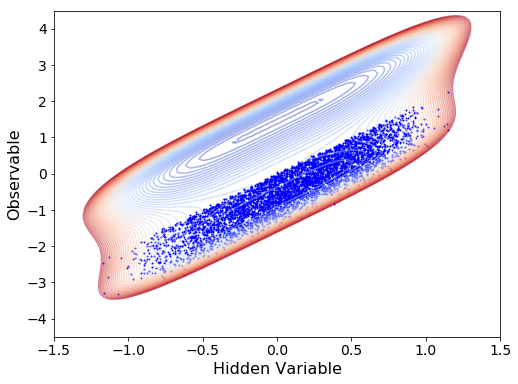

(4711, 2)


In [12]:
levels = np.arange(-3, U_lim, 0.2)
plt.figure(figsize=(8,6))
plt.contour(ye,xe,  energyContours.T, levels, alpha=0.5,cmap=plt.cm.coolwarm)
#plt.contour(xe,ye,  energyContours, levels, alpha=0.5,cmap=plt.cm.coolwarm)

plt.scatter(samples[maski][:,1],samples[maski][:,0],s=1,color='blue')
#plt.scatter(samples[maski][:,0],samples[maski][:,1],s=1,color='blue')
# plt.scatter(samples[~maski][:,0],samples[~maski][:,1],s=3,color='red')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Observable',fontsize=16)
plt.xlabel('Hidden Variable',fontsize=16)
plt.savefig(result_path+'traj_start_sampling.png',dpi=300)

# plt.axis('equal')
plt.show()
print(samples[maski].shape)

In [120]:
def GetDistance(data,ind1,ind2,Metric_L):#Metric_L=1: Manhattan distance , 2: Euclidean distance
    distance=np.linalg.norm(data[ind2]-data[ind1],ord=Metric_L)
    return distance



def ka(dis,dc):#dc cutoff distance
    if(dis>=dc):
        return 0
    else:
        return 1

#local density
def density(data,dc,Metric_L):
    part_density=[]   #local density
    scope=[] #density range
    leftBoundary=0;rightBoundary=len(data)-1 
    for i in range(len(data)):
        traigger=True
        left=i-1
        right=i+1
        incrementLeft=1;incrementRight=1 
        while traigger:
            #extend left
            if incrementLeft!=0:                
                if left<0:
                    left=leftBoundary
                distanceLeft=GetDistance(data,left,i,Metric_L=Metric_L)
                if (distanceLeft<dc)&(left>leftBoundary):
                    left-=1
                else:
                    incrementLeft=0
            #extend right
            if incrementRight!=0:                
                if right>rightBoundary:
                    right=rightBoundary                            
                distanceRight=GetDistance(data,i,right,Metric_L=Metric_L)
                if (distanceRight<dc)&(right<rightBoundary):
                    right+=1
                else:
                    incrementRight=0
            #stop extend
            if (incrementLeft==0)&(incrementRight==0):
                traigger=False
            if (left==leftBoundary)&(incrementRight==0):
                traigger=False
            if (incrementLeft==0)&(right==rightBoundary):
                traigger=False
        if left==leftBoundary:
            scope.append([left,right-1])
            part_density.append(right-left-1)
        elif right==rightBoundary:
            scope.append([left+1,right])
            part_density.append(right-left-1)
        else:
            scope.append([left+1,right-1])
            part_density.append(right-left-2)
    part_density=np.array(part_density)
    scope=np.array(scope)
    return part_density,scope

#reverse update
def SP_search(data,part_density,scope,tc,Metric_L):
    SP=[]

    traigger=True
    used=[]
    while traigger:
        partD=max(part_density)
        index=np.argmax(part_density)
#         print('index:',index)
        start=scope[index][0]
        end=scope[index][1]
        
        if len(used)!=0:
            for i in used:
                if (scope[i][0]>start)&(scope[i][0]<end):
                    part_density[index]=scope[i][0]-start-1
                    scope[index][1]=scope[i][0]-1
#                     print("1_1")
                if (scope[i][1]>start)&(scope[i][1]<end):
                    part_density[index]=end-scope[i][1]-1
                    scope[index][0]=scope[i][1]+1
#                     print("1_2")
                if (scope[i][0]<=start)&(scope[i][1]>=end):
                    part_density[index]=0
                    scope[index][0]=0;scope[index][1]=0
#                     print("1_3")
            start=scope[index][0];end=scope[index][1]
        timeCross=end-start
#         print('time:',timeCross)
        if timeCross>tc:
            S_arrive_t=start
            S_leave_t=end
  
            SP.append(index)
            used.append(index)
            for k in range(scope[index][0],scope[index][1]+1):
                part_density[k]=0
        part_density[index]=0
        if max(part_density)==0:
            traigger=False
    SP=np.array(SP)
    return SP


# #judge stay points overlap
# def similar(sp,data,dc,Metric_L):
#     index=sp.tolist()
#     redundant=[]
#     for i in index:
#         for j in index:
#             if i not in redundant and j>i:
#                 dist=GetDistance(data,i,j,Metric_L=Metric_L)
#                 if dist<dc:
#                     redundant.append(j)
#     print(index,redundant)                
#     for k in set(redundant):
#         index.remove(k)
#     index=np.array(index)
#     return index

def traj_scaling(traj,t_cutoff=6,t_range=50,Metric_L=1):
    
    X=traj[:,1][:,None]
    
    dist_cutoff=max(np.mean(np.linalg.norm(np.diff(X[:t_range],axis=0),axis=1,ord=Metric_L)),np.mean(np.linalg.norm(np.diff(X,axis=0),axis=1,ord=Metric_L)))

    part_density,scope=density(X,dist_cutoff,Metric_L=Metric_L)

    SP=SP_search(X,part_density,scope,t_cutoff,Metric_L=Metric_L)
#     print(SP)
    if SP.shape[0]>0 and np.amin(SP)<t_range:
    
        scale_t=np.amin(SP)

#         print(scale_t,scope[scale_t])
#         plt.scatter(traj[SP,0],traj[SP,1])
#         plt.show()
        

        
        if scope[scale_t][1]-scope[scale_t][0]<2*t_cutoff:
            st=min(max(0,scale_t-t_cutoff),scope[scale_t][0])
            et=max(scale_t+t_cutoff,scope[scale_t][1])
        else:
            st,et=scope[scale_t][0],scope[scale_t][1]
#         print(st,et)  
        traj_scale=np.mean(traj[st:et,1])
    else:
        traj_scale=np.nan

    return traj_scale

In [138]:
# pos_shift_range=[0,2]
# basin_w_range=basin_w=[1.5,2.5]


step=0.05



dt = 0.01
T_ =1.0/np.sqrt(dt)
dur_t = 10

all_traj=[]
all_scale_traj=[]
all_hetero_p=[]
all_peak=[]
trans_count=0
for  xi,yi in samples[maski]:
    print(xi,yi)

    ind_peak,_=find_peaks(D_W(x=xe,y=yi,basin_w=bw,k=kv))
    ind_valley,_=find_peaks(-D_W(x=xe,y=yi,basin_w=bw,k=kv))
    x_peak=xe[ind_peak]
    x_valley=xe[ind_valley]
    print(x_peak,x_valley)
#     print(x_peak+(x_valley[1]-x_peak)*0.4)

    x=xi
    traj=[]
    traj.append([0,xi])
    st=0
    t_c=0
    trans_in=0
    trans_out=0
    while st<dur_t:
        pre_x=x
        Du=dt*(gradx(x=x,y=yi,basin_w=bw,k=kv) + T_*standard_normal())
        x=pre_x+Du

        
        st+=dt
        t_c+=1
        traj.append([t_c,x])
        
#         if x>x_peak+(x_valley[1]-x_peak)*0.4:
#             trans_in=1


#         if trans_in==1:
#             if trans_out==0 and x<x_peak+(x_valley[1]-x_peak)*0.2:
#                 trans_out=1
#                 traj=np.asarray(traj)
#                 scale_traj=traj.copy()
#                 traj_scale=traj_scaling(traj)
   
#                 print('scale',traj_scale)
#                 if traj_scale!=np.nan:
#                     scale_traj[:,1]=scale_traj[:,1]-traj_scale


#                     all_hetero_p.append(yi)
#                     all_traj.append(traj)
#                     all_scale_traj.append(scale_traj)
#                     trans_count+=1
#                     print(trans_count)

#                 break
#     if trans_in==1 and trans_out==0:
    if trans_in==1:
        trans_count+=1
        print(trans_count)
    traj=np.asarray(traj)
    scale_traj=traj.copy()
    traj_scale=x_valley[0]#traj_scaling(traj)

    print('scale',traj_scale)
    if traj_scale!=np.nan:
        scale_traj[:,1]=scale_traj[:,1]-traj_scale


        all_hetero_p.append(yi)
        all_traj.append(traj)
        all_scale_traj.append(scale_traj)
        all_peak.append(x_peak)

        
            
#     traj=np.asarray(traj)
#     scale_traj=traj.copy()
#     traj_scale=traj_scaling(traj)
#     print(xb,traj_scale)
#     if traj_scale!=np.nan:
#         scale_traj[:,1]=scale_traj[:,1]-traj_scale+1



#         all_traj.append(traj)
#         all_scale_traj.append(scale_traj)


1.4259094621352149 0.9101186702020817
[1.86363636] [1.13636364 3.22727273]
scale 1.1363636363636367
-0.6389821611346589 0.029266500070466217
[0.04545455] [-0.59090909  1.5       ]
scale -0.5909090909090908
-0.2820747952725855 0.20270616964386906
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-1.66619866882924 -0.7844914448788676
[-1.59090909] [-2.22727273 -0.13636364]
scale -2.227272727272727
-1.5180329321693944 -0.24898187205071853
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.5401185820141303 -0.09893346252081608
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-0.6507339948285765 -0.14005990120119702
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-0.6489788795914566 -0.2697246014805529
[-0.5] [-1.22727273  0.86363636]
scale -1.227272727272727
-1.8875352143157587 -0.7226152434841515
[-1.40909091] [-2.13636364 -0.04545455]
scale -2.1363636363636362
-0.591356951421895 0.11881381072399344
[0.22727273] [-0.40909091  1.

scale -0.8636363636363633
0.33681352938955644 0.2581474088072925
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.04811120623744236 0.21687410142724609
[0.40909091] [-0.22727273  1.86363636]
scale -0.22727272727272751
-0.07186497146797588 0.561583086636124
[1.13636364] [0.40909091 2.59090909]
scale 0.40909090909090917
-1.1465260893083227 -0.08626253502467818
[-0.13636364] [-0.86363636  1.22727273]
scale -0.8636363636363633
-0.4295457968430887 0.1633512928718001
[0.31818182] [-0.40909091  1.77272727]
scale -0.40909090909090917
-0.9360447250918668 -0.31776414321201485
[-0.59090909] [-1.31818182  0.77272727]
scale -1.318181818181818
-1.596674198541066 -0.4681366584847026
[-0.95454545] [-1.59090909  0.5       ]
scale -1.5909090909090908
-1.981295926418381 -0.44440903874362153
[-0.86363636] [-1.59090909  0.59090909]
scale -1.5909090909090908
-1.5235373447438787 -0.4239105731858106
[-0.86363636] [-1.5         0.59090909]
scale -1.5
-0.9370260887973036 -0.29718311854275864
[-0.590

scale -1.0454545454545454
-1.7946000464398304 -0.2559035911932509
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-1.6941174848120362 -0.6383080829504683
[-1.31818182] [-1.95454545  0.13636364]
scale -1.9545454545454546
0.8053978029998385 0.43494658876675496
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
0.1634977412389973 0.2284367425183541
[0.5] [-0.22727273  1.86363636]
scale -0.22727272727272751
0.423457825615394 0.4284034777526392
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
-0.23821367876278676 0.19252144955452216
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
0.4230347393107994 0.2657739090628738
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.20555762604966732 0.2020517262639383
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-0.8466996462525044 -0.13766975598176076
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-1.0594807094871443 -0.4025869454930603
[-0.77272727] [-1

scale -0.5
-0.5448878696930006 -0.04193256497680284
[-0.04545455] [-0.77272727  1.31818182]
scale -0.7727272727272725
-1.1100127285291217 -0.5302447010958311
[-1.04545455] [-1.77272727  0.40909091]
scale -1.7727272727272725
-0.7062679707890178 -0.1529496339637726
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-0.7437265830510426 -0.14150632633122073
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-0.9869888548069078 -0.29647849859048664
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
0.7527120046838214 0.4237633476474173
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
0.5504185613798129 0.45714971418611383
[0.95454545] [0.22727273 2.31818182]
scale 0.22727272727272751
-1.1629137120437685 -0.284974878690889
[-0.59090909] [-1.22727273  0.86363636]
scale -1.227272727272727
-0.5025424010964119 0.06914142738410906
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
-0.9530151299574147 -0.3352394283522587
[-0.68

-0.15366845380978067 0.341633241716234
[0.68181818] [-0.04545455  2.13636364]
scale -0.04545454545454497
-0.11026256908793666 0.14037940150819608
[0.31818182] [-0.40909091  1.68181818]
scale -0.40909090909090917
0.8448921184437239 0.6121166312681882
[1.22727273] [0.5        2.68181818]
scale 0.5
-0.6230678742363129 0.024359836891793663
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-1.4731404000134614 -0.2106951166868201
[-0.40909091] [-1.13636364  1.04545455]
scale -1.1363636363636362
-0.8558925869960767 0.04933568019352677
[0.13636364] [-0.59090909  1.5       ]
scale -0.5909090909090908
-0.26369490087297287 0.11698274119438293
[0.22727273] [-0.5         1.68181818]
scale -0.5
-0.05555029202495518 0.2312867010592961
[0.5] [-0.22727273  1.86363636]
scale -0.22727272727272751
-0.22793745073724012 0.35047040551849407
[0.68181818] [0.04545455 2.13636364]
scale 0.04545454545454586
-1.3935911157486347 -0.5533304941018944
[-1.13636364] [-1.77272727  0.31818182]
scale -1.772

scale -0.9545454545454546
-0.14162394869882555 0.35539557304658487
[0.68181818] [0.04545455 2.13636364]
scale 0.04545454545454586
0.09441390038527014 0.3506357565844611
[0.68181818] [0.04545455 2.13636364]
scale 0.04545454545454586
-0.6662916019365339 0.015260422858156375
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-0.24320761010242076 0.40212771284978405
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
-1.0310529430642712 0.01620079014025394
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-0.04429963905505163 0.3545030775009164
[0.68181818] [0.04545455 2.13636364]
scale 0.04545454545454586
0.21969120085062943 0.5268657071762296
[1.04545455] [0.31818182 2.5       ]
scale 0.31818181818181834
0.6257175423484138 0.5409473059559462
[1.04545455] [0.40909091 2.5       ]
scale 0.40909090909090917
-0.567477419750875 0.11047878061942507
[0.22727273] [-0.5         1.68181818]
scale -0.5
0.2499536598751767 0.4350818649658675
[0.86363636] [0.13636

scale -0.8636363636363633
-0.3798663437346709 0.08101227183469561
[0.13636364] [-0.5         1.59090909]
scale -0.5
0.35365707341820163 0.3857796274182719
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-0.8826851379318402 0.19783435138407834
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-0.4950980692006437 0.20395204830918215
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-1.1957980963338026 -0.14953729019462236
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-1.3454029743060656 -0.09349758071175007
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-1.7001609077589768 -0.6361031384336623
[-1.22727273] [-1.95454545  0.13636364]
scale -1.9545454545454546
-1.3123763614012511 -0.09320389219107306
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-2.0420651344557568 -0.8315169048476215
[-1.68181818] [-2.31818182 -0.22727273]
scale -2.3181818181818183
-2.3360636295478243 -0.66237420262672

scale 0.04545454545454586
-0.10781080903128837 0.11538668780375391
[0.22727273] [-0.5         1.68181818]
scale -0.5
0.5483672651812934 0.3062480360185623
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
0.22687585261189092 0.5109527475294775
[1.04545455] [0.31818182 2.5       ]
scale 0.31818181818181834
-0.5181323837353178 -0.2157803610801845
[-0.40909091] [-1.13636364  1.04545455]
scale -1.1363636363636362
-1.4661616312893337 -0.5042737433024408
[-1.04545455] [-1.68181818  0.40909091]
scale -1.6818181818181817
-1.3630907534941035 -0.2731007652680755
[-0.59090909] [-1.22727273  0.86363636]
scale -1.227272727272727
-2.160998318696297 -0.9058920924605289
[-1.77272727] [-2.5        -0.40909091]
scale -2.5
-0.7927245435021212 0.041949293179215585
[0.04545455] [-0.59090909  1.5       ]
scale -0.5909090909090908
-1.0110061773563288 -0.3980135788624575
[-0.77272727] [-1.5         0.68181818]
scale -1.5
0.5627351449754467 0.7070775616214379
[1.40909091] [0.68181818 2.86363636

scale -0.22727272727272751
-0.3349715466536178 0.4022564156389923
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
0.6317903528161225 0.7802008927114652
[1.59090909] [0.86363636 3.04545455]
scale 0.8636363636363642
1.35361865999718 0.8058362547499307
[1.59090909] [0.95454545 3.04545455]
scale 0.954545454545455
0.023866186430874348 0.2747974996853993
[0.59090909] [-0.13636364  1.95454545]
scale -0.1363636363636367
0.596786757445874 0.6240833874909292
[1.22727273] [0.59090909 2.68181818]
scale 0.5909090909090908
-0.5762301326030033 -0.007414924267900247
[-0.04545455] [-0.68181818  1.40909091]
scale -0.6818181818181817
-1.4914116219239324 -0.45232245745442057
[-0.86363636] [-1.59090909  0.5       ]
scale -1.5909090909090908
-1.234872958219412 -0.048561747530289745
[-0.13636364] [-0.77272727  1.31818182]
scale -0.7727272727272725
-1.067626910074739 -0.43747517208216846
[-0.86363636] [-1.59090909  0.59090909]
scale -1.5909090909090908
-1.4420879663435895 -0.06794114085507935
[-

scale 0.5
-0.023469341649426934 0.165315921116982
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
-0.8367137131945984 -0.33346811901187223
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
0.18213511270818283 0.2981564586147635
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
1.3226855549527357 0.7105106491252189
[1.40909091] [0.77272727 2.86363636]
scale 0.7727272727272725
-0.4773350703925119 0.1565118186580615
[0.31818182] [-0.40909091  1.77272727]
scale -0.40909090909090917
0.1491454621471568 0.5539274458436605
[1.13636364] [0.40909091 2.59090909]
scale 0.40909090909090917
0.45150957501991584 0.6038245591321952
[1.22727273] [0.5        2.68181818]
scale 0.5
1.067088538568909 0.6572207086052922
[1.31818182] [0.59090909 2.77272727]
scale 0.5909090909090908
0.4564893147241784 0.4643290275186631
[0.95454545] [0.22727273 2.40909091]
scale 0.22727272727272751
-1.2858349252577073 -0.27446545117143123
[-0.59090909] [-1.22727273  0.86363636]
s

scale 0.5
0.9703423099080104 0.6855067012384348
[1.40909091] [0.68181818 2.77272727]
scale 0.6818181818181817
1.3314883229908037 0.8300037474505251
[1.68181818] [0.95454545 3.13636364]
scale 0.954545454545455
-0.5551858880305252 -0.23303075382334562
[-0.5] [-1.13636364  0.95454545]
scale -1.1363636363636362
-0.9528833535569962 -0.05895067192972936
[-0.13636364] [-0.77272727  1.31818182]
scale -0.7727272727272725
-0.9675171858588222 -0.30725651342418714
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
0.40815236280905975 0.649948183610323
[1.31818182] [0.59090909 2.77272727]
scale 0.5909090909090908
0.51671448935821 0.527421298169773
[1.04545455] [0.31818182 2.5       ]
scale 0.31818181818181834
-1.0415432059491634 -0.09742164433265643
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
0.16627457816867852 0.27725213420727013
[0.59090909] [-0.13636364  1.95454545]
scale -0.1363636363636367
-1.0435717951779448 -0.34925863106816857
[-0.68181818] [-1.40909091 

scale -1.7727272727272725
-1.2932867034700732 -0.48327544459468713
[-0.95454545] [-1.68181818  0.5       ]
scale -1.6818181818181817
-1.8972527495441245 -0.47202606650486684
[-0.95454545] [-1.59090909  0.5       ]
scale -1.5909090909090908
-2.3038543615381464 -0.4942844135052892
[-0.95454545] [-1.68181818  0.40909091]
scale -1.6818181818181817
-2.7162511338383206 -0.9588890182117573
[-1.95454545] [-2.59090909 -0.5       ]
scale -2.590909090909091
-1.052098458347402 -0.41241367100168325
[-0.86363636] [-1.5         0.59090909]
scale -1.5
0.39641260274982093 0.3132140188389777
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
0.5553145987113852 0.3729752976810148
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
0.7682167192088686 0.6016770921926513
[1.22727273] [0.5        2.68181818]
scale 0.5
0.37546633481794683 0.554343133705365
[1.13636364] [0.40909091 2.59090909]
scale 0.40909090909090917
-0.34191941477995064 0.20557741658233142
[0.40909091] [-0.31818182

scale -0.7727272727272725
-1.1664885636142615 -0.4652493566916289
[-0.95454545] [-1.59090909  0.5       ]
scale -1.5909090909090908
-1.2560875957048858 -0.44426617361112286
[-0.86363636] [-1.59090909  0.59090909]
scale -1.5909090909090908
-0.48509479316188553 0.1796519223957863
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
-0.9080352991769756 -0.05855842672962874
[-0.13636364] [-0.77272727  1.31818182]
scale -0.7727272727272725
0.2004850670706917 0.42432006817755874
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
0.02733711898893776 0.1681861703837508
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
0.0767767015955374 0.5643005557417421
[1.13636364] [0.40909091 2.59090909]
scale 0.40909090909090917
0.8444242127018229 0.5010196681317994
[1.04545455] [0.31818182 2.40909091]
scale 0.31818181818181834
-0.10938245571601257 0.5963554300628967
[1.22727273] [0.5        2.59090909]
scale 0.5
0.46759182836214697 0.6026982311717909
[1.22727273] [

scale 1.0454545454545459
1.112985237194847 0.7714492051971399
[1.5] [0.86363636 2.95454545]
scale 0.8636363636363642
1.066540751841007 0.8571579053034772
[1.68181818] [1.04545455 3.13636364]
scale 1.0454545454545459
-0.11112583970109641 0.2800184124443722
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
0.06798175441086188 0.3232998481756618
[0.68181818] [-0.04545455  2.04545455]
scale -0.04545454545454497
0.15787218323514451 0.23917687832527285
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
0.04874259446859397 0.36535219120567247
[0.77272727] [0.04545455 2.13636364]
scale 0.04545454545454586
-0.4302918628924361 0.2702499921691641
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.12756441306603838 0.0892936303780063
[0.13636364] [-0.5         1.59090909]
scale -0.5
-1.106278496144375 -0.4775856877974427
[-0.95454545] [-1.68181818  0.5       ]
scale -1.6818181818181817
-0.7892683151203381 0.18065023569798377
[0.31818182] [-0.31818182  1.77272727]
s

scale -1.227272727272727
-1.911623063023822 -0.41483292375233094
[-0.86363636] [-1.5         0.59090909]
scale -1.5
0.01761858978683395 0.45056880257528487
[0.86363636] [0.22727273 2.31818182]
scale 0.22727272727272751
-0.4698445124729966 0.19347032277839715
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-0.30875860700198143 0.3955365068722258
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
0.9862423364357186 0.6039574426330793
[1.22727273] [0.5        2.68181818]
scale 0.5
-0.3540373034779891 -0.09025901005346293
[-0.13636364] [-0.86363636  1.22727273]
scale -0.8636363636363633
-0.16321908660146126 0.13632184102378306
[0.22727273] [-0.40909091  1.68181818]
scale -0.40909090909090917
-0.05985277122973476 0.3140590335520335
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
-0.9915971369986897 -0.26173046673669953
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.856344276154445 0.28593261426900296
[0.59090909] [-0.13636364  2.0

scale 0.8636363636363642
1.0873726430263788 0.7466728527057362
[1.5] [0.77272727 2.95454545]
scale 0.7727272727272725
-0.7028953482399917 -0.24888602342846805
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.08799658759088447 0.2756221543754501
[0.59090909] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.09678755143981178 0.17630063064274532
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
-0.3913661499942608 -0.043013041386107065
[-0.04545455] [-0.77272727  1.31818182]
scale -0.7727272727272725
-0.9225160940781924 -0.4266688857439822
[-0.86363636] [-1.5         0.59090909]
scale -1.5
-0.40734903448616255 0.05210345173688269
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
-0.792126635247278 0.05909239943661006
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
-0.624153224696343 -0.265659514709078
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.24198582951329858 -0.02803150823879952
[-0.04545455] [-0.772727

scale -1.1363636363636362
-1.4946799862067572 -0.6063129902335835
[-1.22727273] [-1.86363636  0.22727273]
scale -1.8636363636363638
-2.257824634708343 -0.719451120505997
[-1.40909091] [-2.13636364  0.04545455]
scale -2.1363636363636362
-1.6574991942704624 -0.34249147098158816
[-0.68181818] [-1.40909091  0.77272727]
scale -1.4090909090909092
-1.6627894311384994 -0.32396253505302947
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
-0.5613473184444262 -0.07258569415203209
[-0.13636364] [-0.86363636  1.31818182]
scale -0.8636363636363633
0.28891441222691994 0.34182883290333144
[0.68181818] [-0.04545455  2.13636364]
scale -0.04545454545454497
-1.1820012120119512 -0.3671218402456192
[-0.77272727] [-1.40909091  0.68181818]
scale -1.4090909090909092
-0.45104487978755037 -0.04552083878298721
[-0.13636364] [-0.77272727  1.31818182]
scale -0.7727272727272725
0.23100158705132678 0.5054288027457349
[1.04545455] [0.31818182 2.40909091]
scale 0.31818181818181834
-0.5003255724439869 -0

[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
-0.016842865782588867 0.4033992860672492
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
-0.7426079908141572 -0.09119375611978886
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-0.6662078618070082 0.10758677308602557
[0.22727273] [-0.5         1.68181818]
scale -0.5
-0.5977197517639561 -0.13757942770591156
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-1.2878657983791915 -0.15394332174091252
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-1.1980197161920838 -0.4281841504637416
[-0.86363636] [-1.59090909  0.59090909]
scale -1.5909090909090908
-1.190388883283771 -0.10927485956273308
[-0.22727273] [-0.95454545  1.22727273]
scale -0.9545454545454546
-0.8148406526838217 -0.31382145570852515
[-0.59090909] [-1.31818182  0.77272727]
scale -1.318181818181818
-0.11406253889817286 0.35519248992928665
[0.68181818] [0.04545455 2.13636364]
scale 0.0454545454545458

scale -0.31818181818181834
0.5346251153734237 0.37198528427855465
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-1.6260023804045045 -0.4829888015945876
[-0.95454545] [-1.68181818  0.5       ]
scale -1.6818181818181817
0.41153350791085397 0.5852424043723475
[1.13636364] [0.5        2.59090909]
scale 0.5
0.22976660672020355 0.59976679179214
[1.22727273] [0.5        2.68181818]
scale 0.5
-0.3013755249969837 -0.0008115885105189902
[-0.04545455] [-0.68181818  1.40909091]
scale -0.6818181818181817
-0.39269858120887813 0.0962700965684804
[0.22727273] [-0.5         1.59090909]
scale -0.5
-1.0668016586739317 -0.32807915792930964
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
0.10891202641196918 0.11072154327912537
[0.22727273] [-0.5         1.68181818]
scale -0.5
0.7618979701087095 0.6866132446367292
[1.40909091] [0.68181818 2.77272727]
scale 0.6818181818181817
0.09972683032965834 0.15427798431238793
[0.31818182] [-0.40909091  1.77272727]
scale -0.409090909090

scale 0.31818181818181834
-0.26342551205048265 0.34068236454780215
[0.68181818] [-0.04545455  2.13636364]
scale -0.04545454545454497
0.12109550227859889 0.28338083092405963
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
0.5284621006583098 0.5571358043942733
[1.13636364] [0.40909091 2.59090909]
scale 0.40909090909090917
-1.5278870299001805 -0.18699518210076638
[-0.40909091] [-1.04545455  1.04545455]
scale -1.0454545454545454
-1.6095694577411548 -0.5852198557714552
[-1.13636364] [-1.86363636  0.22727273]
scale -1.8636363636363638
-0.35785774865593867 0.07360061509032485
[0.13636364] [-0.5         1.59090909]
scale -0.5
-0.23698624456298456 -0.09192650050820193
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-1.0767003959079389 -0.329154305900377
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
-0.7800564906101676 -0.3352790813168779
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
-2.1282407984161122 -0.5304684255508909


[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-0.7664134885182609 -0.020912997629512986
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-1.1170316603853487 -0.26246571685515585
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
0.355475613511532 0.46092031352600243
[0.95454545] [0.22727273 2.40909091]
scale 0.22727272727272751
-0.516702595903182 -0.2253769432186215
[-0.40909091] [-1.13636364  0.95454545]
scale -1.1363636363636362
-0.542815732232709 0.2219552793851971
[0.40909091] [-0.22727273  1.86363636]
scale -0.22727272727272751
-0.18675876457125115 0.3675256457491055
[0.77272727] [0.04545455 2.13636364]
scale 0.04545454545454586
-1.8959650676581719 -0.4982525644168631
[-0.95454545] [-1.68181818  0.40909091]
scale -1.6818181818181817
-1.3546616621900998 -0.2659238306352292
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.4695150115718095 0.17858633950079345
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
-1.63

scale 0.31818181818181834
-0.6137566519820934 -0.06595142928469427
[-0.13636364] [-0.86363636  1.31818182]
scale -0.8636363636363633
-1.256688068072632 -0.4623426543666089
[-0.95454545] [-1.59090909  0.5       ]
scale -1.5909090909090908
-0.13903335032620134 0.008308205189056839
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-0.18193657618298267 0.04466095570762882
[0.04545455] [-0.59090909  1.5       ]
scale -0.5909090909090908
-1.0764075092026142 -0.26416018991233436
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.42798844688294924 0.20504287042977554
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-1.108708908928302 -0.15672629795083193
[-0.31818182] [-1.04545455  1.13636364]
scale -1.0454545454545454
-0.8619894599534504 -0.022033670058793448
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-1.0259902796268388 -0.04510427844844581
[-0.04545455] [-0.77272727  1.31818182]
scale -0.7727272727272725
0.39222423200963136 0.

0.8972143407078909 0.4997721658158998
[0.95454545] [0.31818182 2.40909091]
scale 0.31818181818181834
0.07313086754413922 0.3124128563703377
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
0.6436813778547554 0.7325305511912246
[1.5] [0.77272727 2.86363636]
scale 0.7727272727272725
-0.3192027805837372 -0.054681529000064955
[-0.13636364] [-0.77272727  1.31818182]
scale -0.7727272727272725
-0.368659349819072 -0.16057767127891515
[-0.31818182] [-1.04545455  1.13636364]
scale -1.0454545454545454
0.05423406158803605 0.32029413305474785
[0.68181818] [-0.04545455  2.04545455]
scale -0.04545454545454497
0.691033005102697 0.8182422129197373
[1.59090909] [0.95454545 3.04545455]
scale 0.954545454545455
-0.7390660374725494 -0.335849260565951
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
-0.5928542590670058 -0.30656357581961835
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
0.04056979096802238 0.12711418169841765
[0.22727273] [-0.40909091  1.6818

[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
-0.547188626386076 0.0011239504326653327
[0.04545455] [-0.68181818  1.40909091]
scale -0.6818181818181817
-0.4693048286389103 0.14169224321874596
[0.31818182] [-0.40909091  1.68181818]
scale -0.40909090909090917
-0.27491504989361315 0.2734428588112558
[0.59090909] [-0.13636364  1.95454545]
scale -0.1363636363636367
-1.5230992541608324 -0.48390326200819156
[-0.95454545] [-1.68181818  0.5       ]
scale -1.6818181818181817
-1.7287810649478377 -0.5320232377141024
[-1.04545455] [-1.77272727  0.40909091]
scale -1.7727272727272725
-1.36021170655023 -0.20574060565041136
[-0.40909091] [-1.13636364  1.04545455]
scale -1.1363636363636362
0.4244638949543011 0.6115340935251946
[1.22727273] [0.5        2.68181818]
scale 0.5
-1.006227198369737 -0.1778908799221679
[-0.31818182] [-1.04545455  1.04545455]
scale -1.0454545454545454
-1.1775279325635806 -0.5778605285255133
[-1.13636364] [-1.86363636  0.31818182]
scale -1.8636363636363638
-1.0817799

scale -0.31818181818181834
0.17527143423282004 0.588641160109231
[1.13636364] [0.5        2.59090909]
scale 0.5
0.3966319538336093 0.34120418657458534
[0.68181818] [-0.04545455  2.13636364]
scale -0.04545454545454497
0.2151413585022705 0.4073482955538343
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
-0.1635323585648324 0.024869438964934543
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
0.9476654854180117 0.5393668469513918
[1.04545455] [0.40909091 2.5       ]
scale 0.40909090909090917
0.3653583255192384 0.6269128105241537
[1.22727273] [0.59090909 2.68181818]
scale 0.5909090909090908
0.23550382085098903 0.6285548747685434
[1.22727273] [0.59090909 2.68181818]
scale 0.5909090909090908
-0.21902726307593218 0.13165496641195817
[0.22727273] [-0.40909091  1.68181818]
scale -0.40909090909090917
0.3794209128378021 0.3646705456299312
[0.77272727] [0.04545455 2.13636364]
scale 0.04545454545454586
-0.04055562261500123 0.39802213511297424
[0.77272727] [0.13636364 2

[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
0.19994695694992592 0.13832876160622593
[0.31818182] [-0.40909091  1.68181818]
scale -0.40909090909090917
-1.6298627197439652 -0.2049465613339539
[-0.40909091] [-1.13636364  1.04545455]
scale -1.1363636363636362
-1.1510030277128767 -0.4240143574553291
[-0.86363636] [-1.5         0.59090909]
scale -1.5
-0.1499985886412336 0.38603251411387474
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-0.4811532996109247 -0.10795129317334895
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-1.0108373844551068 -0.4560893294795809
[-0.95454545] [-1.59090909  0.5       ]
scale -1.5909090909090908
0.5838776017641913 0.4517761531138892
[0.86363636] [0.22727273 2.31818182]
scale 0.22727272727272751
-0.2885169513200183 0.15493953886017803
[0.31818182] [-0.40909091  1.77272727]
scale -0.40909090909090917
-1.0555688849807363 -0.3085742091418681
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
-0.

[-0.31818182] [-1.04545455  1.04545455]
scale -1.0454545454545454
-1.9654261939243955 -0.7436615085374709
[-1.5] [-2.13636364 -0.04545455]
scale -2.1363636363636362
-0.13620733931208728 0.004277158734962372
[0.04545455] [-0.68181818  1.40909091]
scale -0.6818181818181817
0.7735435202034322 0.46162035292987996
[0.95454545] [0.22727273 2.40909091]
scale 0.22727272727272751
-0.08641017156383257 0.1558793198273688
[0.31818182] [-0.40909091  1.77272727]
scale -0.40909090909090917
-0.5701305189505108 0.3031505880852528
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
-0.5766736517924063 -0.10159279255921583
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-0.9171214925717708 0.068411213949375
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
-0.6408059361468161 -0.1191789709636493
[-0.22727273] [-0.95454545  1.22727273]
scale -0.9545454545454546
0.3334309075903947 0.42989020408995027
[0.86363636] [0.13636364 2.31818182]
scale 0.136363636363636

scale -1.0454545454545454
-1.7229945989120243 -0.6628039548360952
[-1.31818182] [-2.04545455  0.13636364]
scale -2.0454545454545454
0.5547833364357078 0.61396130615803
[1.22727273] [0.5        2.68181818]
scale 0.5
0.1619672677585745 0.34107551842922046
[0.68181818] [-0.04545455  2.13636364]
scale -0.04545454545454497
0.602190747426588 0.6528421192016083
[1.31818182] [0.59090909 2.77272727]
scale 0.5909090909090908
1.1396010104489736 0.8126348458503585
[1.59090909] [0.95454545 3.04545455]
scale 0.954545454545455
-0.27005669274132815 0.3130657811929534
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
0.34068443980522234 0.6152524292540642
[1.22727273] [0.5        2.68181818]
scale 0.5
1.5272368975943418 0.8583546936301893
[1.68181818] [1.04545455 3.13636364]
scale 1.0454545454545459
0.26769855753472505 0.2673504598765527
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.3508828190081926 -0.16403348151380093
[-0.31818182] [-1.04545455  1.13636364]
scale -1.045

scale -0.6818181818181817
-1.6950235510140088 -0.5550605842094954
[-1.13636364] [-1.77272727  0.31818182]
scale -1.7727272727272725
-0.0666815805869288 -0.031905490701892636
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-0.5101293666110542 0.1376656439876636
[0.31818182] [-0.40909091  1.68181818]
scale -0.40909090909090917
-0.5417774180777564 -0.08798376089008847
[-0.13636364] [-0.86363636  1.22727273]
scale -0.8636363636363633
-0.010677864614793031 0.3158396130691102
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
-0.2881641587079458 -0.1267932818353712
[-0.22727273] [-0.95454545  1.22727273]
scale -0.9545454545454546
0.8537291698824079 0.4492212641916695
[0.86363636] [0.22727273 2.31818182]
scale 0.22727272727272751
1.150588340741476 0.8118801151967061
[1.59090909] [0.95454545 3.04545455]
scale 0.954545454545455
-0.042558759829872006 0.2543837073166788
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
0.26338750674897926 0.37639187893843

scale -0.1363636363636367
0.7490888758956387 0.48791322221182065
[0.95454545] [0.31818182 2.40909091]
scale 0.31818181818181834
0.39741436927209656 0.26038597399285746
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
0.45650050611458515 0.2926737390265295
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
-1.457443334539418 -0.48324216969272826
[-0.95454545] [-1.68181818  0.5       ]
scale -1.6818181818181817
-1.877285512274059 -0.598126743128289
[-1.22727273] [-1.86363636  0.22727273]
scale -1.8636363636363638
-1.4484288067088824 -0.3275230740106945
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
-2.083259476330853 -0.4829814653663632
[-0.95454545] [-1.68181818  0.5       ]
scale -1.6818181818181817
-0.08667092871561399 0.2405275279640915
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
0.07807687900895566 0.21479722074971286
[0.40909091] [-0.22727273  1.86363636]
scale -0.22727272727272751
-1.1441806973744337 -0.36045134849816085
[-0.

scale 0.40909090909090917
-2.001372399170155 -0.30985643253530015
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
-0.8638894665247232 -0.02363926319074955
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
0.8558780304960241 0.6012149106600672
[1.22727273] [0.5        2.68181818]
scale 0.5
-0.49556038091765275 0.02175140710364043
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
0.3251514613784928 0.18517287897089102
[0.40909091] [-0.31818182  1.77272727]
scale -0.31818181818181834
-0.5671681713414102 -0.12062154414070081
[-0.22727273] [-0.95454545  1.22727273]
scale -0.9545454545454546
-1.2190425674436394 -0.12067599735064569
[-0.22727273] [-0.95454545  1.22727273]
scale -0.9545454545454546
-1.59052596441725 -0.2658469452500689
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.4410290968337407 0.007521698931746257
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
0.06776038809522411 0.6467562722143619
[1.31818182

scale -0.5
-1.0388736628518278 -0.38725677862228153
[-0.77272727] [-1.5         0.68181818]
scale -1.5
-0.6851314984253878 -0.008180467105064343
[-0.04545455] [-0.68181818  1.40909091]
scale -0.6818181818181817
-1.6640921519493006 -0.24941128378383753
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-0.15520457982303837 0.29309141895244967
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
-0.606433061437313 -0.03980295502179809
[-0.04545455] [-0.77272727  1.31818182]
scale -0.7727272727272725
-0.3096131894152484 0.19074434843408056
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-0.18885298905518183 0.14782554757511107
[0.31818182] [-0.40909091  1.77272727]
scale -0.40909090909090917
-1.151533033141498 -0.23425273173322547
[-0.5] [-1.13636364  0.95454545]
scale -1.1363636363636362
0.7537372773372892 0.6378364769198337
[1.31818182] [0.59090909 2.68181818]
scale 0.5909090909090908
-0.7822100125236012 0.25585177749119414
[0.5] [-0.13636364  1.9545

scale -0.31818181818181834
0.21443702953370347 0.21325200580811204
[0.40909091] [-0.22727273  1.86363636]
scale -0.22727272727272751
0.5119707990191816 0.7467370527563619
[1.5] [0.77272727 2.95454545]
scale 0.7727272727272725
-0.05982733346587821 0.49601825844327396
[0.95454545] [0.31818182 2.40909091]
scale 0.31818181818181834
-1.1337088029731568 -0.5208097113218426
[-1.04545455] [-1.77272727  0.40909091]
scale -1.7727272727272725
-0.29280735782306144 0.3598884792925575
[0.68181818] [0.04545455 2.13636364]
scale 0.04545454545454586
-0.2923764754636394 0.29795023787501895
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
-0.2550590477352527 0.10964801069629956
[0.22727273] [-0.5         1.68181818]
scale -0.5
0.6620679008453592 0.5296843054321708
[1.04545455] [0.40909091 2.5       ]
scale 0.40909090909090917
1.3630961212866617 0.7774299328671752
[1.59090909] [0.86363636 2.95454545]
scale 0.8636363636363642
-0.17083873072963407 0.15863625044418492
[0.31818182] [-0.4090909

scale -1.4090909090909092
-1.6992180274318962 -0.5576491436980414
[-1.13636364] [-1.77272727  0.31818182]
scale -1.7727272727272725
-1.8325004119154933 -0.5253118242641402
[-1.04545455] [-1.77272727  0.40909091]
scale -1.7727272727272725
-0.824340745355532 -0.15029601229811002
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
0.5130347554652521 0.3425723744337405
[0.68181818] [-0.04545455  2.13636364]
scale -0.04545454545454497
-0.35878028364994863 0.07294238489086424
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
0.09597817050389479 0.387568755504413
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-0.1219126372269772 0.2837113227795239
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
-0.4939224331996816 -0.01774220653796077
[-0.04545455] [-0.68181818  1.40909091]
scale -0.6818181818181817
0.5259326037133929 0.4201521098680649
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
0.22084755327899008 0.190587561420

scale 0.31818181818181834
-1.5046277166833244 -0.44159004627076776
[-0.86363636] [-1.59090909  0.59090909]
scale -1.5909090909090908
-1.2657712005052915 -0.3987789756232963
[-0.77272727] [-1.5         0.68181818]
scale -1.5
0.9333567064888265 0.5451181323200642
[1.04545455] [0.40909091 2.5       ]
scale 0.40909090909090917
-0.614687971969797 0.20111683728179075
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
-1.819215400701041 -0.32147094772103507
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
-1.0521287033551971 -0.4973218238911793
[-0.95454545] [-1.68181818  0.40909091]
scale -1.6818181818181817
0.44047591957472765 0.38497660531827776
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-1.22309676332078 -0.1570234068586125
[-0.31818182] [-1.04545455  1.13636364]
scale -1.0454545454545454
-0.4672446651381481 0.0912321132431389
[0.22727273] [-0.5         1.59090909]
scale -0.5
1.0572809161295136 0.7508085530966571
[1.5] [0.77272727 2.95454

scale -1.0454545454545454
-0.39439150903996234 0.02754689500641061
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-0.2296259705073 0.5189464875532513
[1.04545455] [0.31818182 2.5       ]
scale 0.31818181818181834
0.015199260580283758 0.41571049019799466
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
-0.9120093815016985 -0.2799644756818481
[-0.59090909] [-1.22727273  0.86363636]
scale -1.227272727272727
0.7677503600152327 0.730264495251984
[1.5] [0.77272727 2.86363636]
scale 0.7727272727272725
-1.6483655073407921 -0.5533381050840843
[-1.13636364] [-1.77272727  0.31818182]
scale -1.7727272727272725
-0.5021044092358296 -0.1830325984075042
[-0.40909091] [-1.04545455  1.04545455]
scale -1.0454545454545454
0.048158898195854394 0.4221287568035834
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
-0.1873425558327308 0.5957399544931743
[1.22727273] [0.5        2.59090909]
scale 0.5
-0.6123870316076407 0.21242905814968893
[0.40909091] [-0.22727273  1.

scale -1.318181818181818
-1.4602877350387402 -0.3405200100087793
[-0.68181818] [-1.40909091  0.77272727]
scale -1.4090909090909092
0.49175027731593546 0.6121627183103173
[1.22727273] [0.5        2.68181818]
scale 0.5
-1.1630237845276552 -0.34418175091978837
[-0.68181818] [-1.40909091  0.77272727]
scale -1.4090909090909092
-0.8166607481150479 -0.1654689431134384
[-0.31818182] [-1.04545455  1.13636364]
scale -1.0454545454545454
-1.5606007050476127 -0.15685608187887037
[-0.31818182] [-1.04545455  1.13636364]
scale -1.0454545454545454
-1.5077438973173385 -0.05056034258234968
[-0.13636364] [-0.77272727  1.31818182]
scale -0.7727272727272725
0.0029122358950026683 0.38570128576472906
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-1.0265075365508052 -0.3059043271212327
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
-1.3816725240786447 -0.028039812466378822
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-0.4169613885787662 0.4582886210474134

scale 0.22727272727272751
-0.4588570445598503 0.14603427721654078
[0.31818182] [-0.40909091  1.77272727]
scale -0.40909090909090917
0.657970435900449 0.4230884595229614
[0.86363636] [0.13636364 2.31818182]
scale 0.1363636363636367
0.42511686978621666 0.38043872458154804
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
0.1791509144305512 0.4873943634133065
[0.95454545] [0.31818182 2.40909091]
scale 0.31818181818181834
0.2703029988648148 0.19237889806012798
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
0.26010474826711993 0.3424704053600566
[0.68181818] [-0.04545455  2.13636364]
scale -0.04545454545454497
0.36700596555991416 0.25467337869181056
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
0.13020917496467332 0.119275688113616
[0.22727273] [-0.40909091  1.68181818]
scale -0.40909090909090917
0.6317607336376457 0.5048439014479607
[1.04545455] [0.31818182 2.40909091]
scale 0.31818181818181834
0.531327623701505 0.5742761554068136
[1.13636364] [

scale -0.5
-0.40942223170255004 0.037778451358785325
[0.04545455] [-0.59090909  1.5       ]
scale -0.5909090909090908
-0.33735802431123507 0.0556781313627914
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
0.6893997548609418 1.0007683113362593
[2.04545455] [1.31818182 3.40909091]
scale 1.3181818181818183
-0.5774585428601167 0.074886666477739
[0.13636364] [-0.5         1.59090909]
scale -0.5
1.283295401334753 0.9531752530908156
[1.86363636] [1.22727273 3.31818182]
scale 1.2272727272727275
-0.32039366153095034 0.05418502384003332
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
0.027137752750654304 0.26573818734638366
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
0.1261915594713432 0.5251491746039268
[1.04545455] [0.31818182 2.5       ]
scale 0.31818181818181834
-0.33835599807635747 0.029417663123393556
[0.04545455] [-0.59090909  1.5       ]
scale -0.5909090909090908
1.5434599053827833 0.7951671018848391
[1.59090909] [0.86363636 3.04545455]
sc

scale 0.1363636363636367
0.21885931049338747 0.3498080551411631
[0.68181818] [0.04545455 2.13636364]
scale 0.04545454545454586
-0.1849747462041616 0.24706686701391567
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
-0.6979682968570413 0.047097362837251855
[0.13636364] [-0.59090909  1.5       ]
scale -0.5909090909090908
-1.6261421509085359 -0.5160549574457354
[-1.04545455] [-1.68181818  0.40909091]
scale -1.6818181818181817
-1.2974527741456785 -0.10804990221189237
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
-1.4514959959479943 -0.3555246168224302
[-0.68181818] [-1.40909091  0.77272727]
scale -1.4090909090909092
-1.6988992800719973 -0.31061288467901754
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
0.3446840801017954 0.48236043124400463
[0.95454545] [0.31818182 2.40909091]
scale 0.31818181818181834
-0.020852543685240477 0.09531761231067909
[0.22727273] [-0.5         1.59090909]
scale -0.5
-1.1285287303622056 -0.4871180135968742
[-0.95454

scale -0.5
-0.5332291661673476 -0.026395919813960035
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-0.474556854489117 0.016750092065259348
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-0.6824398470849169 -0.021813450146534935
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-1.5020502303677934 -0.535307141423466
[-1.04545455] [-1.77272727  0.40909091]
scale -1.7727272727272725
-0.3993048730301818 0.1657729843573239
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
0.4157240014487264 0.2795876436981055
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
0.8851982580861226 0.5085798494118822
[1.04545455] [0.31818182 2.5       ]
scale 0.31818181818181834
0.7345186544036317 0.693068983200615
[1.40909091] [0.68181818 2.86363636]
scale 0.6818181818181817
0.10322751411497189 0.06389017340029585
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
0.16654046854915672 0.2047668247989315
[0.40909091

scale 0.31818181818181834
0.09844166956530287 0.38073111377470364
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-1.0069061794704202 0.05734664928612987
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
-0.26200801970734766 0.03947149075227829
[0.04545455] [-0.59090909  1.5       ]
scale -0.5909090909090908
-1.3594024886130356 -0.35990056270275816
[-0.68181818] [-1.40909091  0.68181818]
scale -1.4090909090909092
0.20035850702635327 0.5993278426484314
[1.22727273] [0.5        2.68181818]
scale 0.5
-0.2385448409612686 0.38930356770128993
[0.77272727] [0.04545455 2.22727273]
scale 0.04545454545454586
-0.42776815322800865 0.0010075909973603636
[0.04545455] [-0.68181818  1.40909091]
scale -0.6818181818181817
0.04384448297204557 0.2015757359167612
[0.40909091] [-0.31818182  1.86363636]
scale -0.31818181818181834
0.06576936224326824 0.45391416671188306
[0.86363636] [0.22727273 2.31818182]
scale 0.22727272727272751
0.9500450852081658 0.8080360904929631
[1.5909090

scale -1.1363636363636362
0.034233865146444775 0.2818918152225913
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
-1.0569443918451893 -0.039802087854481916
[-0.04545455] [-0.77272727  1.31818182]
scale -0.7727272727272725
-1.6545214627564273 -0.20837609779229727
[-0.40909091] [-1.13636364  1.04545455]
scale -1.1363636363636362
-1.6639756331946258 -0.41881398726327534
[-0.86363636] [-1.5         0.59090909]
scale -1.5
-0.031747925377980546 0.4111202727336618
[0.86363636] [0.13636364 2.22727273]
scale 0.1363636363636367
-0.9762387592343411 -0.30049841878947925
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
-0.40952585062896685 0.057945919495214326
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
0.5381149616954539 0.6775924826119721
[1.31818182] [0.68181818 2.77272727]
scale 0.6818181818181817
0.18002825477948114 0.6193000899646659
[1.22727273] [0.59090909 2.68181818]
scale 0.5909090909090908
-1.6111767635865746 -0.5599823858986419
[-1.1

scale 0.22727272727272751
0.6880370032077363 0.8480843133864705
[1.68181818] [1.04545455 3.13636364]
scale 1.0454545454545459
0.41393552455842997 0.44387859801315366
[0.86363636] [0.22727273 2.31818182]
scale 0.22727272727272751
0.5624279875437427 0.6571464627709234
[1.31818182] [0.59090909 2.77272727]
scale 0.5909090909090908
-0.22362936320410087 0.39224430111709585
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
-0.9662538905982654 -0.1307765204206055
[-0.22727273] [-0.95454545  1.13636364]
scale -0.9545454545454546
-0.1183721090996177 -0.039256940027739384
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-1.1283163154026679 -0.2688356170628877
[-0.5] [-1.22727273  0.86363636]
scale -1.227272727272727
-1.7247971356512641 -0.4785852285285051
[-0.95454545] [-1.68181818  0.5       ]
scale -1.6818181818181817
-0.351284362237468 0.05862550560996016
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
-1.0460395043436579 -0.5019988619438583
[-1.04

scale -1.9545454545454546
-1.7835240792992915 -0.5669358182904582
[-1.13636364] [-1.86363636  0.31818182]
scale -1.8636363636363638
-1.7070346340065727 -0.28630008024133535
[-0.59090909] [-1.22727273  0.86363636]
scale -1.227272727272727
-1.6900198590656144 -0.7676530728979647
[-1.5] [-2.22727273 -0.13636364]
scale -2.227272727272727
-2.0961425030865297 -0.8895026442469407
[-1.77272727] [-2.5        -0.31818182]
scale -2.5
0.8191527290051772 0.4895798286361288
[0.95454545] [0.31818182 2.40909091]
scale 0.31818181818181834
0.5581991143898057 0.4006519681542657
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
0.4430658752578922 0.24719334796603415
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
-1.022718729580022 -0.22091035788643687
[-0.40909091] [-1.13636364  1.04545455]
scale -1.1363636363636362
-1.1481379447192517 -0.0697777111298723
[-0.13636364] [-0.86363636  1.31818182]
scale -0.8636363636363633
0.06032498953950438 0.3060591092345578
[0.59090909] [-0.045454

scale -1.6818181818181817
-1.3550798890289062 -0.3037019150956441
[-0.59090909] [-1.31818182  0.86363636]
scale -1.318181818181818
-1.1935150205564589 -0.34748044913953435
[-0.68181818] [-1.40909091  0.77272727]
scale -1.4090909090909092
0.29798790324239643 0.16443383748563556
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
0.45018809616829397 0.2724889104424606
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.20957769204338533 0.4376229811598958
[0.86363636] [0.22727273 2.31818182]
scale 0.22727272727272751
-1.8298012101036718 -0.39038055997547016
[-0.77272727] [-1.5         0.68181818]
scale -1.5
-1.9007571013005826 -0.7346025961642805
[-1.5] [-2.13636364 -0.04545455]
scale -2.1363636363636362
0.5992935010328093 0.6306362094141064
[1.22727273] [0.59090909 2.68181818]
scale 0.5909090909090908
0.7402535106818783 0.5357688263099807
[1.04545455] [0.40909091 2.5       ]
scale 0.40909090909090917
0.5420148575032665 0.5214309605917218
[1.04545455] [0.31818182 2

scale -1.6818181818181817
0.4457107726913834 0.2614111801861564
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.4331749286882781 -0.02382051841529076
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-1.1624507584815431 0.018565616381374495
[0.04545455] [-0.68181818  1.5       ]
scale -0.6818181818181817
-0.30740767140067765 0.36780440490034627
[0.77272727] [0.04545455 2.13636364]
scale 0.04545454545454586
0.4175946766438086 0.2535434760804886
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
0.12962497788689986 0.298304092884235
[0.59090909] [-0.13636364  2.04545455]
scale -0.1363636363636367
-1.0511862523382733 -0.3310116301014743
[-0.68181818] [-1.31818182  0.77272727]
scale -1.318181818181818
-0.9270866624887449 0.09871502438737939
[0.22727273] [-0.5         1.68181818]
scale -0.5
-1.467530325538009 -0.5661385050842103
[-1.13636364] [-1.86363636  0.31818182]
scale -1.8636363636363638
-1.2785428034167745 -0.13961449863565534
[-0.31818182] [-0.95

[-0.40909091] [-1.13636364  1.04545455]
scale -1.1363636363636362
-1.7570332554869021 -0.2565537556829975
[-0.5] [-1.22727273  0.95454545]
scale -1.227272727272727
-2.157032641190087 -0.6465523214042508
[-1.31818182] [-1.95454545  0.13636364]
scale -1.9545454545454546
-0.916673332145133 0.17776435996395834
[0.31818182] [-0.31818182  1.77272727]
scale -0.31818181818181834
0.5570964416850293 0.5445221709504358
[1.04545455] [0.40909091 2.5       ]
scale 0.40909090909090917
-0.7158895916541906 0.2522160717510109
[0.5] [-0.22727273  1.95454545]
scale -0.22727272727272751
-1.0461770028083253 -0.06907137897624982
[-0.13636364] [-0.86363636  1.31818182]
scale -0.8636363636363633
-1.9070882121584165 -0.7555839800190289
[-1.5] [-2.22727273 -0.04545455]
scale -2.227272727272727
-0.25890558198574887 0.07079207315253888
[0.13636364] [-0.59090909  1.59090909]
scale -0.5909090909090908
0.1748097869215371 0.46072653862190793
[0.95454545] [0.22727273 2.40909091]
scale 0.22727272727272751
-0.12868914576

scale -0.7727272727272725
0.2915339791174516 0.2696372447226127
[0.5] [-0.13636364  1.95454545]
scale -0.1363636363636367
-0.21588451811711643 0.09742662057468171
[0.22727273] [-0.5         1.68181818]
scale -0.5
-1.2559803653016284 -0.150646917461438
[-0.31818182] [-0.95454545  1.13636364]
scale -0.9545454545454546
-0.6069727652086242 -0.11585278925950321
[-0.22727273] [-0.95454545  1.22727273]
scale -0.9545454545454546
-0.5742424533436525 0.30441473132037233
[0.59090909] [-0.04545455  2.04545455]
scale -0.04545454545454497
1.1036593113285533 0.7212203257161264
[1.40909091] [0.77272727 2.86363636]
scale 0.7727272727272725
0.6387369948192559 0.5580687161851828
[1.13636364] [0.40909091 2.59090909]
scale 0.40909090909090917
-0.3415271430209281 0.08355274025891907
[0.13636364] [-0.5         1.59090909]
scale -0.5
0.212188486040487 0.6275978568709815
[1.22727273] [0.59090909 2.68181818]
scale 0.5909090909090908
0.329399789542759 0.2684435091836318
[0.5] [-0.13636364  1.95454545]
scale -0.1

scale -0.5
0.22482139292883757 0.45159127018854783
[0.86363636] [0.22727273 2.31818182]
scale 0.22727272727272751
0.8504992409650678 0.6678997679904815
[1.31818182] [0.68181818 2.77272727]
scale 0.6818181818181817
1.2718119335425224 0.869600575059599
[1.77272727] [1.04545455 3.13636364]
scale 1.0454545454545459
-1.3210468473696935 -0.5218611640323225
[-1.04545455] [-1.77272727  0.40909091]
scale -1.7727272727272725
-1.302437732672876 -0.552190353064457
[-1.13636364] [-1.77272727  0.31818182]
scale -1.7727272727272725
-2.1193516310707623 -0.649889912686684
[-1.31818182] [-1.95454545  0.13636364]
scale -1.9545454545454546
-1.4891722739736886 -0.3995262212837917
[-0.77272727] [-1.5         0.68181818]
scale -1.5
-0.4826061329616938 -0.1894807926233441
[-0.40909091] [-1.04545455  1.04545455]
scale -1.0454545454545454
0.38614827160818427 0.3916532353758239
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
0.2193469513778763 0.1664970331999912
[0.31818182] [-0.31818182  1.7727272

scale -0.7727272727272725
-0.42687825924825673 -0.09772068254720055
[-0.22727273] [-0.86363636  1.22727273]
scale -0.8636363636363633
1.2818146569831015 0.8063900680341916
[1.59090909] [0.95454545 3.04545455]
scale 0.954545454545455
1.1382985681292916 0.8382256855995298
[1.68181818] [0.95454545 3.13636364]
scale 0.954545454545455
0.31237671536053546 0.7189568632960086
[1.40909091] [0.77272727 2.86363636]
scale 0.7727272727272725
-0.6011848780582154 -0.063670043889973
[-0.13636364] [-0.86363636  1.31818182]
scale -0.8636363636363633
-1.4446592167514218 -0.7267414005569907
[-1.40909091] [-2.13636364 -0.04545455]
scale -2.1363636363636362
-0.6204204919217619 -0.023729602462300936
[-0.04545455] [-0.77272727  1.40909091]
scale -0.7727272727272725
-0.6964098433898054 -0.2352158241941784
[-0.5] [-1.13636364  0.95454545]
scale -1.1363636363636362
-1.0271798010346123 -0.1993339512994901
[-0.40909091] [-1.04545455  1.04545455]
scale -1.0454545454545454
-1.0257429758186858 -0.26738719255957916
[-

scale 0.5909090909090908
-0.6990252422030352 0.08626134344628278
[0.13636364] [-0.5         1.59090909]
scale -0.5
-0.3426057314011026 0.09133294361752065
[0.22727273] [-0.5         1.59090909]
scale -0.5
0.5885011452615603 0.5934016697197786
[1.22727273] [0.5        2.59090909]
scale 0.5
-1.109640289657765 -0.19182055790640776
[-0.40909091] [-1.04545455  1.04545455]
scale -1.0454545454545454
0.8653071621314601 0.4589357446160863
[0.95454545] [0.22727273 2.31818182]
scale 0.22727272727272751
1.067610877477214 0.6911885015061767
[1.40909091] [0.68181818 2.86363636]
scale 0.6818181818181817
0.7074672325485043 0.4022841273415405
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
-0.14607420523010628 0.39606832143514686
[0.77272727] [0.13636364 2.22727273]
scale 0.1363636363636367
-0.15295511725033403 0.13176224670488318
[0.22727273] [-0.40909091  1.68181818]
scale -0.40909090909090917
-0.5773053009743961 -0.22462286213070104
[-0.40909091] [-1.13636364  0.95454545]
scale -1.1363

high 0.4474015629160968
low -0.4704406035289857


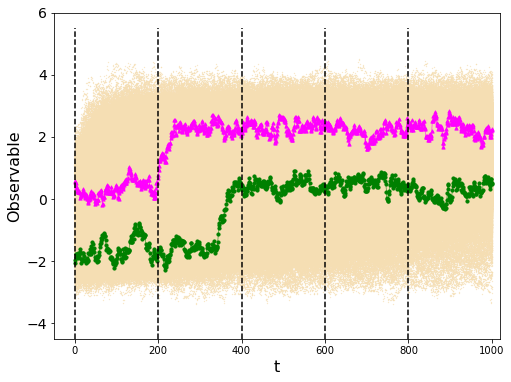

In [144]:
plt.figure(figsize=(8,6))

for i in range(len(all_traj)):
    traj=all_traj[i]
    plt.scatter(traj[:,0],traj[:,1],s=0.1,color='wheat')
flagl=0
flagm=0
flagh=0
for i in range(len(all_traj)):

    traj=all_traj[i]
    dot_color=np.arange(traj.shape[0])
    
    if traj.shape[0]>600 and np.mean(traj[:50,1])<-1.8 and traj[400,1]>-0.2 and traj[300,1]<-1 and flagl==0 and abs(all_hetero_p[i]+0.5)<0.1:
        flagl=1
        print('low',all_hetero_p[i])
        plt.scatter(traj[:,0],traj[:,1],s=10,color='green')
        plt.plot(traj[:,0],traj[:,1],color='green',linewidth=0.5)

    
#     if traj.shape[0]>700 and abs(traj[0,1]-(-1))<0.01 and flagm==0:
#         flagm=1
#         plt.scatter(traj[:,0],traj[:,1],s=10,c=dot_color,cmap=plt.cm.jet)
        
    if traj.shape[0]>600 and np.mean(traj[:50,1])>0.1 and traj[200,1]<1 and traj[300,1]>1.2 and flagh==0 and abs(all_hetero_p[i]-0.5)<0.1:
        flagh=1
        print('high',all_hetero_p[i])
        plt.scatter(traj[:,0],traj[:,1],marker='^',s=10,color='magenta')
        plt.plot(traj[:,0],traj[:,1],color='magenta',linewidth=0.5)
    if flagl==1 and flagh==1:
        break


for t in [0,200,400,600,800]:
    b=np.arange(-4.5,6,0.5)
    a=t*np.ones(b.shape)
    plt.plot(a,b, '--',color='black', linewidth=1.5)
plt.axis([-50,1020,-4.5,6])
plt.ylabel('Observable',fontsize=16)

plt.xlabel('t',fontsize=16)
plt.yticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.colorbar()
plt.savefig(result_path+'traj.png',dpi=300)

plt.show()  

(0, 2) (4784,)


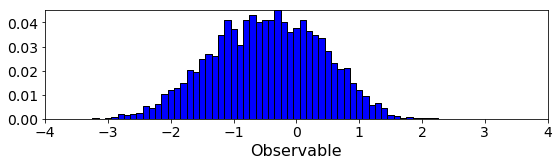

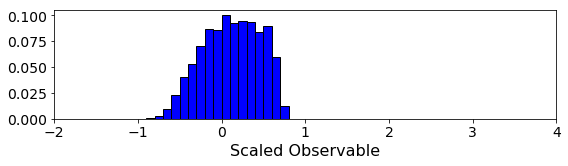

(2546, 2) (4784,)


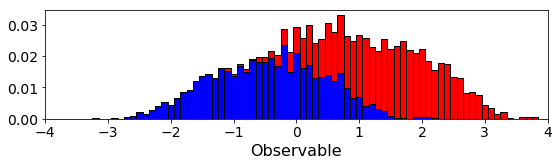

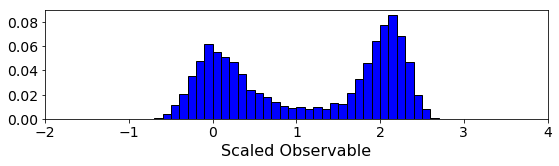

(3696, 2) (4784,)


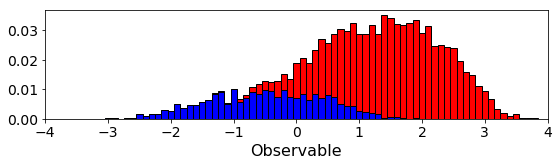

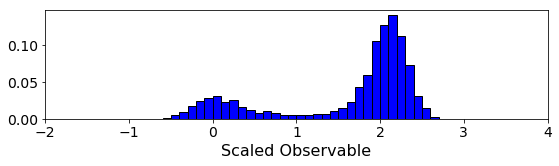

(4234, 2) (4784,)


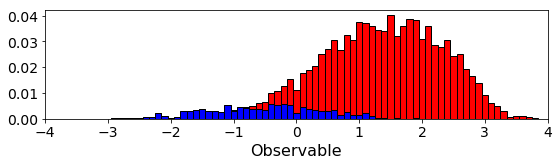

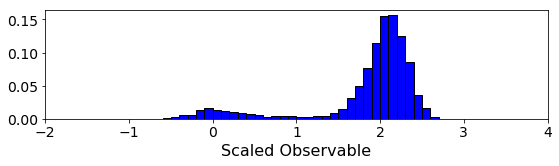

(4486, 2) (4784,)


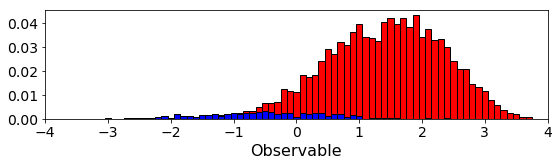

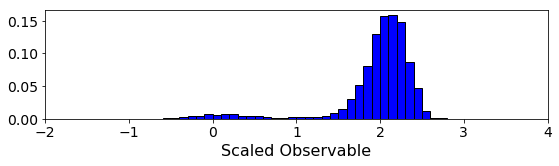

(4612, 2) (4784,)


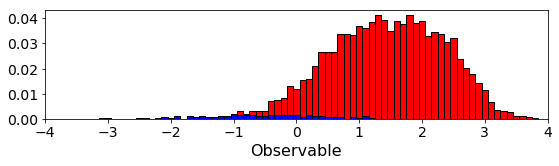

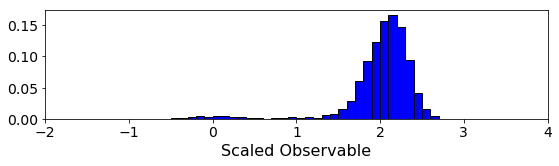

In [139]:
all_traj_arr=np.concatenate(all_traj,axis=0)
all_scale_traj_arr=np.concatenate(all_scale_traj,axis=0)
# plt.figure(figsize=(8,6))
# sns.kdeplot(all_traj_arr[:,1],linewidth=4,color='blue')
# plt.xlabel('Observable',fontsize=16)
# plt.ylabel('Kernel Desity Estimation',fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig(result_path+'kde.png',dpi=300)

# plt.show()

# plt.figure(figsize=(8,6))
# sns.kdeplot(all_scale_traj_arr[:,1],linewidth=4,color='red')
# plt.xlabel('Scaled Observable',fontsize=16)
# plt.ylabel('Kernel Desity Estimation',fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig(result_path+'kde_scale.png',dpi=300)

# plt.show()

# df=pd.DataFrame(np.column_stack((all_traj_arr[:,1],all_scale_traj_arr[:,1])),columns=['X','Scaled X'])
# g = sns.jointplot(x="X", y="Scaled X",s=0.01, data=df)
# plt.show()

bin1=np.arange(-4,4,0.1)
bin2=np.arange(-4,4,0.1)
for ti in np.arange(0,1020,200):
    mask_a=all_traj_arr[:,0]==ti
    mask_s=(all_scale_traj_arr[mask_a])[:,1]>1
    print(all_traj_arr[mask_a][mask_s].shape,mask_s.shape)
    weights1 = np.ones_like(all_traj_arr[mask_a][:,1])/float(len(all_traj_arr[mask_a][:,1]))
    plt.figure(figsize=(9,2))
    
#     plt.hist([all_traj_arr[mask_a][mask_s][:,1],all_traj_arr[mask_a][~mask_s][:,1]],\
#              bins=bin1, edgecolor = 'black',stacked=True, color=["red", "blue"], density = True)
    a1=np.histogram(all_traj_arr[mask_a][~mask_s][:,1],bins=bin1)[0]\
               *(1/float(len(all_traj_arr[mask_a][:,1])))
  
    plt.bar(bin1[:-1],np.histogram(all_traj_arr[mask_a][~mask_s][:,1],bins=bin1)[0]\
               *(1/float(len(all_traj_arr[mask_a][:,1]))), width=0.1,align='center',color='blue',edgecolor = 'black')
    plt.bar(bin1[:-1],np.histogram(all_traj_arr[mask_a][mask_s][:,1],bins=bin1)[0]\
               *(1/float(len(all_traj_arr[mask_a][:,1]))),width=0.1,align='center',bottom=a1,color='red',edgecolor = 'black')
#     plt.hist(all_traj_arr[mask_a][:,1],bins=bin1,weights=weights1,color='r',edgecolor = 'black')

    plt.xlim(-4,4)
    plt.xlabel('Observable',fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(result_path+'X_'+str(ti)+'.png',dpi=300)

    plt.show()
    
    weights2 = np.ones_like(all_scale_traj_arr[mask_a][:,1])/float(len(all_scale_traj_arr[mask_a][:,1]))

    plt.figure(figsize=(9,2))
    plt.hist(all_scale_traj_arr[mask_a][:,1],bins=bin2,weights=weights2,color='b',edgecolor = 'black')
    plt.xlim(-2,4)
    plt.xlabel('Scaled Observable',fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(result_path+'scaled_X_'+str(ti)+'.png',dpi=300)
    plt.show()

In [131]:
# # basin_w=2
# # pos_shift=0
# import numpy as np
# from matplotlib import pyplot as plt
# def DW1(x,k=1):
#         return k*(x**2-1)**2
# def DW(x):
#     return DW1(x[0]) + DW1(x[1])

# mx=2

# xe=np.linspace(-mx, mx, 100)
# ye=np.linspace(-mx, mx, 100)
# energyContours=np.zeros((100, 100))
# for i in range(0,len(xe)):
#     for j in range(0,len(ye)):
#         xtmp=np.array([xe[i], ye[j]] )
#         energyContours[j,i]=DW(xtmp)

# levels = np.arange(0, 10, 0.25)
# plt.contour(xe, ye, energyContours, levels, cmap=plt.cm.coolwarm)
# # plt.scatter(X[:,0], X[:,1], s=5, c='k')
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.show()
    
    
    

# def f(x,pos_shift=pos_shift,basin_w=basin_w,k=1):
# # calculate -dV/dx:
#     return 4*basin_w*k*(x-pos_shift)-4*k*(x-pos_shift)**3

# step=0.05
# x_range=2
# X=np.arange(-x_range+pos_shift,x_range+pos_shift+step,step)
# # for x in X:
# #     plt.plot(x,DW1(x),'.')
# # plt.show()
# plt.figure(figsize=(8,6))
# plt.plot(X,DW1(X),color='blue',linewidth=3)

# plt.xlabel('X',fontsize=16)
# plt.ylabel('U',fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# # plt.savefig(result_path+'potential.png',dpi=300)
# plt.show()

# X1=X[X<pos_shift]
# print(X1[np.argmin(DW1(X1))])



# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111, projection='3d')
# nbins = 50

# pos_range=np.arange(0,2,0.2)
# c_range=np.arange(10)
# for c, z in zip(['r', 'g', 'b', 'y'], [0,0.5,1,1.5]):
# # for c, z in zip(c_range, pos_range):
#     pos_shift=z
#     X=np.arange(-x_range+pos_shift,x_range+pos_shift+step,step)
#     ax.plot(X,DW1(X,pos_shift=z), zs=z, zdir='y', color=c,linewidth=4)


# plt.xticks(fontsize=14)
# plt.yticks([0,0.5,1,1.5],fontsize=14)
# ax.set_xlabel('X',fontsize=16)
# ax.set_ylabel('Shift',fontsize=16)
# ax.set_zlabel('U',fontsize=16)
# ax.view_init(azim=80, elev=20)
# plt.savefig(result_path+'shift.png',dpi=300)
# plt.show()

In [132]:
# import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D


# mpl.rcParams['legend.fontsize'] = 10

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# z = np.linspace(-2, 2, 100)
# r = z**2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
# ax.plot(x, y, z, label='parametric curve')
# ax.legend()

# ax.set_xlabel('$X$', fontsize=20)
# ax.set_ylabel('$Y$')
# ax.yaxis._axinfo['label']['space_factor'] = 3.0
# # set z ticks and labels
# ax.set_zticks([-2, 0, 2])
# # change fontsize
# for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
# # disable auto rotation
# ax.zaxis.set_rotate_label(False) 
# ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
# plt.show()

In [133]:

# #time step
# dt = 0.01
# T_ =np.sqrt(3.0/dt)

# x=[-basin_w+pos_shift,-basin_w+pos_shift]
# print(x)
# traj=[]
# dur_t = 30
# st=0
# while st<dur_t:
#     pre_x=x
#     Du=dt*(f(x[0]) + T_*standard_normal())
#     x[0]=pre_x[0]+Du
#     Dv=dt*(f(x[1]) + T_*standard_normal())
#     x[1]=pre_x[1]+Dv
#     traj.append([x[0],x[1]])
#     st+=dt
# #     if x[0]>(basin_w*0.6+pos_shift) and x[1]>(basin_w*0.6+pos_shift):
# #         break
# print(x,st)

# traj=np.asarray(traj)
# print(traj.shape)
# dot_color=np.arange(traj.shape[0])

# plt.contour(xe, ye, energyContours, levels, cmap=cm.coolwarm)
# plt.scatter(traj[:,0],traj[:,1],s=10,c=dot_color,cmap=plt.cm.jet)

# plt.show()

In [134]:
# x=np.random.rand()-2
# print(x)
# traj=[]
# dur_t = 30
# st=0
# while st<dur_t:
#     pre_x=x
#     Du=dt*(f(x) + T_*standard_normal())
#     x=pre_x+Du

#     traj.append(x)
#     st+=dt
#     if x>1:#(basin_w*0.6+pos_shift):
#         break
# print(x,st)



# traj=np.asarray(traj)
# dot_color=np.arange(traj.shape[0])
# plt.scatter(np.arange(traj.shape[0]),traj,s=10,c=dot_color,cmap=plt.cm.jet)

# plt.show()